In [14]:
!pip install opencv-python matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/103.3 kB ? eta -:--:--
     --- ------------------------------------ 10.2/103.3 kB ? eta -:--:--
     -------------------------------------  102.4/103.3 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 103.3/103.3 kB 1.5 MB/s eta 0:00:00
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
    --------------------------------------- 0.1/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.4/8.0 MB 5.9 MB/s eta 0:00:02
   - -------------------------------------- 0.4/8.0 MB 5.9 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/8.0 MB 5.6 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/8.0 MB 5.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.2/8.0 MB 5.5 MB/s eta 0:00:02
   -------- ------------------------------- 1

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [23]:
def show_image(img: np.ndarray, figsize: tuple = (12,8)):
    plt.figure(figsize=figsize)

    # Converte BGR para RGB para exibição correta
    resultado_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Mostra a imagem
    plt.imshow(resultado_rgb)
    plt.axis('off')  # Remove os eixos
    plt.show()


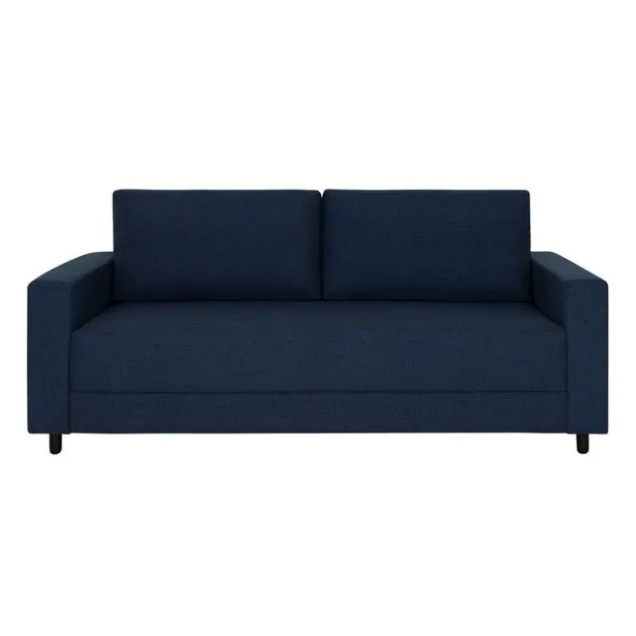

In [24]:
img = cv2.imread('couch.jpg')

show_image(img)


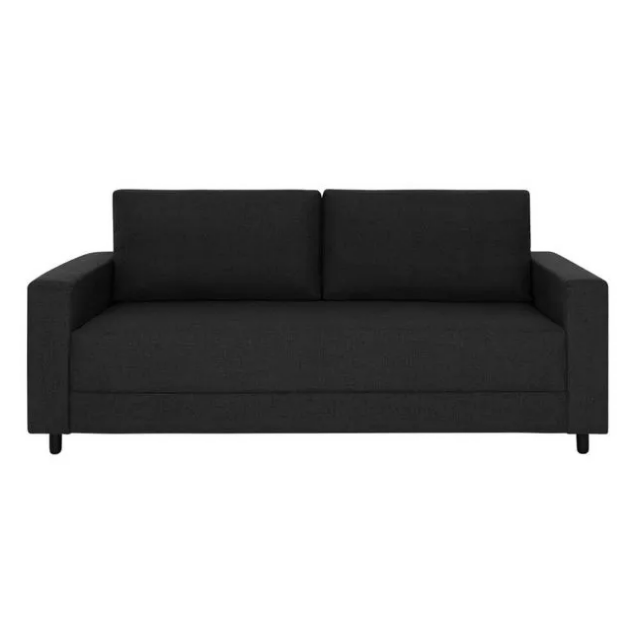

In [32]:
# Converts the image to grayscale
img_black_white = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_image(img_black_white)

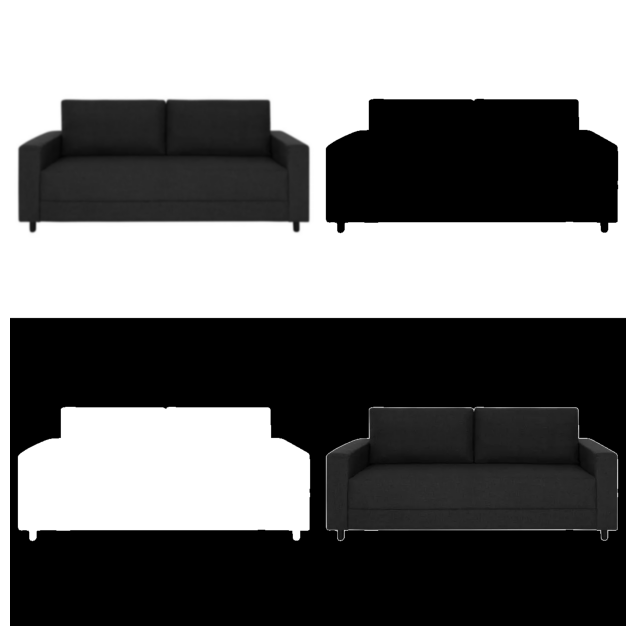

In [33]:
# Applies Gaussian blur to the image
# (7,7) is the size of the kernel (the larger, the more blurred)
soft = cv2.GaussianBlur(img_black_white, (7, 7), 0)

# Applies a simple threshold to the image
# Pixels above 160 are white (255), below are black (0)
(T, bin) = cv2.threshold(soft, 210, 255, cv2.THRESH_BINARY)

# Applies an inverse threshold to the image
# Pixels above 160 are black (0), below are white (255)
(T, binI) = cv2.threshold(soft, 210, 255, cv2.THRESH_BINARY_INV)

# Mounts an image with 4 quadrants for visualization:
result = np.vstack([  # Pushes vertically two lines
    np.hstack([soft, bin]),     # First line: smoothed image and normal threshold
    np.hstack([binI, cv2.bitwise_and(img_black_white, img_black_white, mask = binI)])  # Second line: inverse threshold and mask
])

show_image(result)